In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve



In [2]:
df = pd.read_csv('data/Hotel_Reservations.csv')

In [3]:
df.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

 ## column description

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

## Exploratory data analysis (EDA) 

<AxesSubplot:>

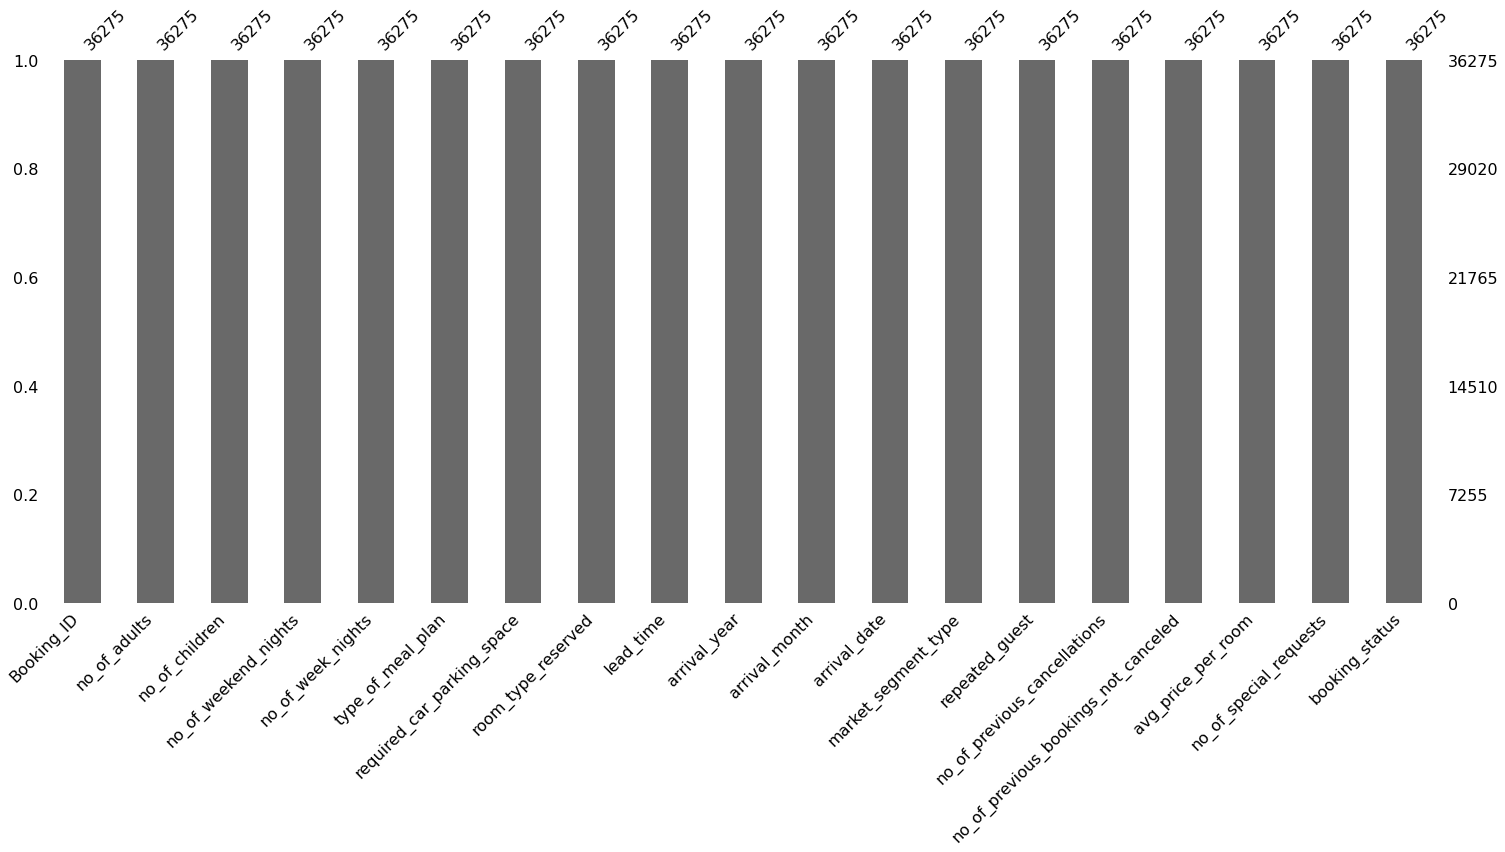

In [6]:
msno.bar(df)

In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

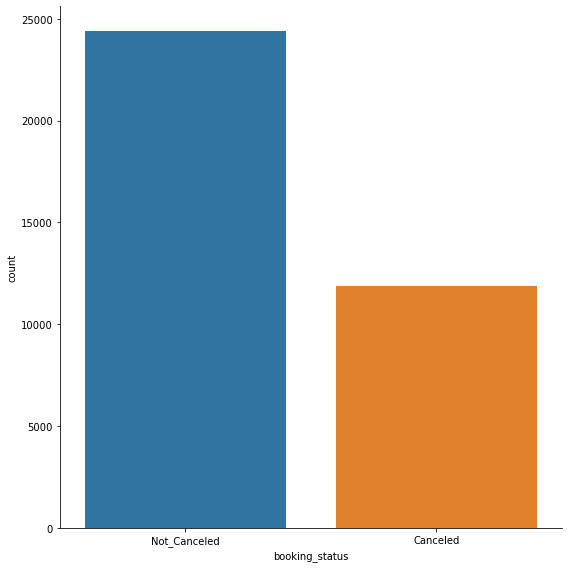

In [8]:
sns.catplot(data=df, x="booking_status", kind="count",height=8)

In [9]:
print('Canceled_rate is',len(df[df['booking_status'] == 'Canceled'])*100/len(df),'%')

Canceled_rate is 32.76361130254997 %


Imbalance dataset have to under sampling the data.

### create new feature

In [10]:
df['total_guest'] = df['no_of_adults'] + df['no_of_children']

In [11]:
df['total_night'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

In [12]:
df['date'] = pd.to_datetime(dict(year=df.arrival_year, month=df.arrival_month, day=df.arrival_date), errors='coerce')

In [13]:
df['total_previous_booking'] = df['no_of_previous_cancellations'] + df['no_of_previous_bookings_not_canceled']

In [14]:
df['previous_booking_rate'] = np.where(df['total_previous_booking'] < 1 ,df['total_previous_booking'],df['no_of_previous_bookings_not_canceled']*100 / df['total_previous_booking'])

<AxesSubplot:>

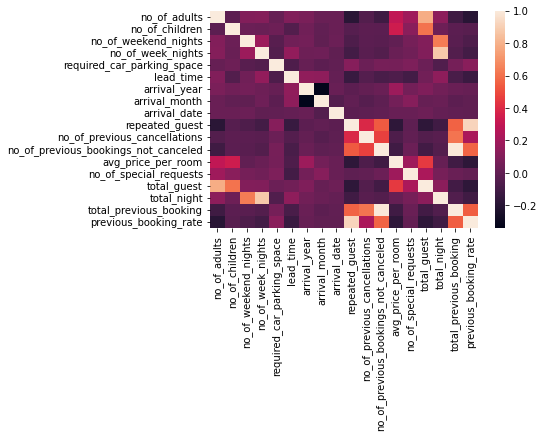

In [15]:
sns.heatmap(df.corr())

Which month is the high season customer booking 

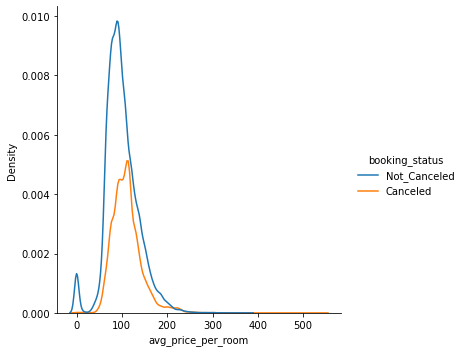

In [16]:
sns.displot(df,x="avg_price_per_room",hue="booking_status", kind="kde")

In [17]:
# remove the outliner of the data
def removeoutliner(col):
    sorted(col)
    q1,q2 = col.quantile([0.25,0.75])
    IQR = q2 - q1
    lowb = q1 -(1.5*IQR)
    upb = q2 +(1.5*IQR)
    return lowb,upb
lowb,upb = removeoutliner(df["avg_price_per_room"])

In [18]:
df_filtered = df[(df["avg_price_per_room"] < upb) & (df["avg_price_per_room"] > lowb)]

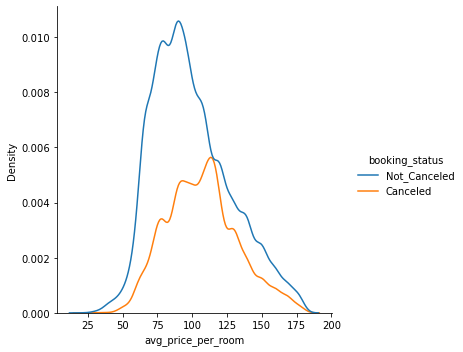

In [19]:
sns.displot(df_filtered,x="avg_price_per_room",hue="booking_status", kind="kde")

In [20]:
print("the average price per room is",df_filtered['avg_price_per_room'].mean())
print("the average price per room customer not canceled  is",df_filtered[df_filtered['booking_status'] == 'Not_Canceled']['avg_price_per_room'].mean())
print("the average price per room customer canceled is",df_filtered[df_filtered['booking_status'] == 'Canceled']['avg_price_per_room'].mean())

the average price per room is 102.09358194279767
the average price per room customer not canceled  is 99.61147763647375
the average price per room customer canceled is 107.10023819911004


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

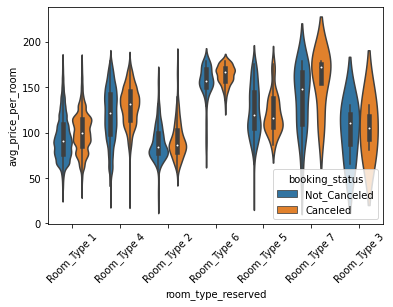

In [21]:
sns.violinplot(data=df_filtered, x="room_type_reserved", y="avg_price_per_room", hue="booking_status")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

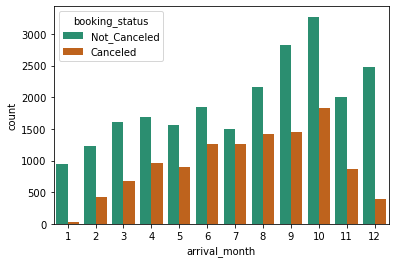

In [22]:
sns.countplot(data=df_filtered, x="arrival_month",palette="Dark2", hue="booking_status")

### From the data show that in the first month of the least cancel book and in the middle of the year is the most cancel hotel booking.

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

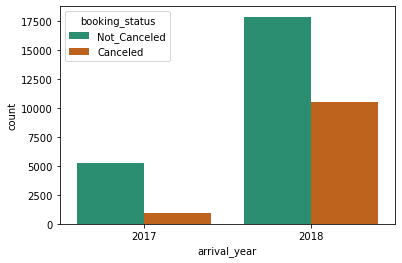

In [23]:
sns.countplot(data=df_filtered, x="arrival_year",palette="Dark2", hue="booking_status")

There might be some problem in year 2018 that cause booking canceled

In [24]:
df_2018 = df_filtered[df_filtered['arrival_year'] == 2018]
df_2017 = df_filtered[df_filtered['arrival_year'] == 2017]

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

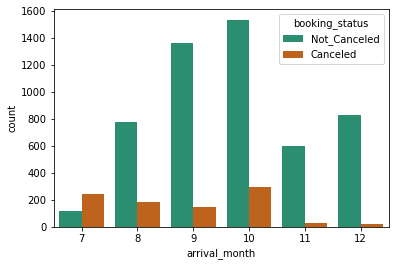

In [25]:
sns.countplot(data=df_2017, x="arrival_month",palette="Dark2", hue="booking_status")    

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

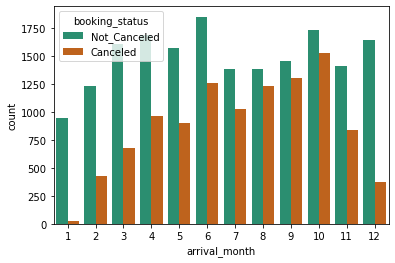

In [26]:
sns.countplot(data=df_2018, x="arrival_month",palette="Dark2", hue="booking_status")    

The data show that the data started from 7/2017 -12/2018

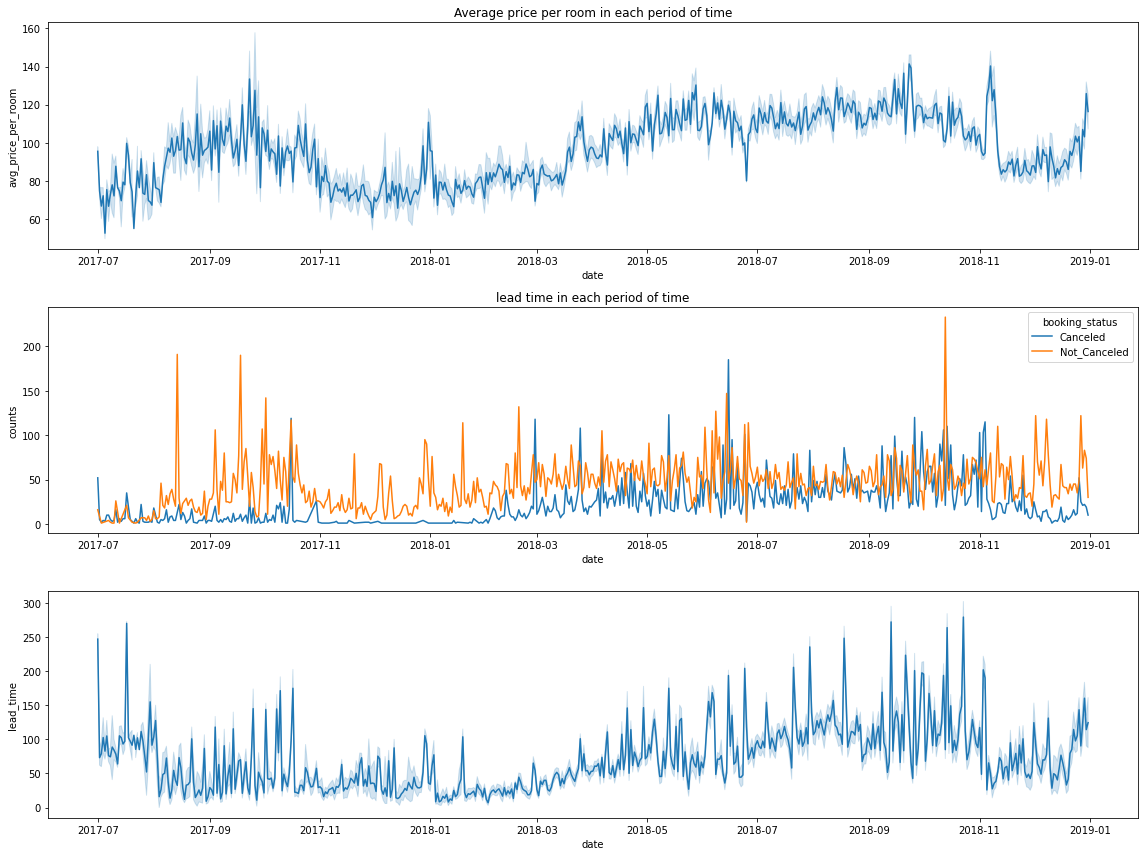

In [27]:
df_viz = df.copy()
df_viz = df_viz.groupby(['date','booking_status']).size().reset_index(name='counts')


fig, ax = plt.subplots(3, 1, figsize=(16, 12))
sns.lineplot(data=df_filtered, x="date",y="avg_price_per_room",ax=ax[0])
sns.lineplot(data=df_viz, x="date",y="counts",hue="booking_status",ax=ax[1])
sns.lineplot(data=df_filtered, x="date",y="lead_time",ax=ax[2])

ax[0].set_title('Average price per room in each period of time')
ax[1].set_title('lead time in each period of time')

plt.tight_layout()

low avg price in 11/2017 - 03/2018

<AxesSubplot:xlabel='lead_time', ylabel='booking_status'>

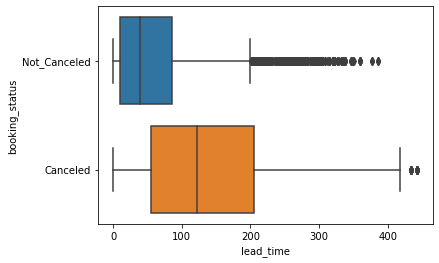

In [28]:
sns.boxplot(data=df, x="lead_time", y="booking_status")

### from the data we can see that if customer booking for a long term( > 100 day about 3month up) likely to cancel the booking while customer who booking soon likely to less canceled the booking

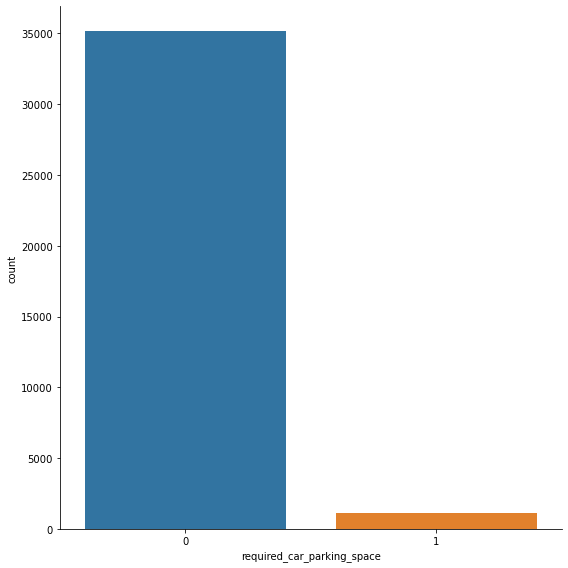

In [29]:
sns.catplot(data=df, x="required_car_parking_space", kind="count",height=8)

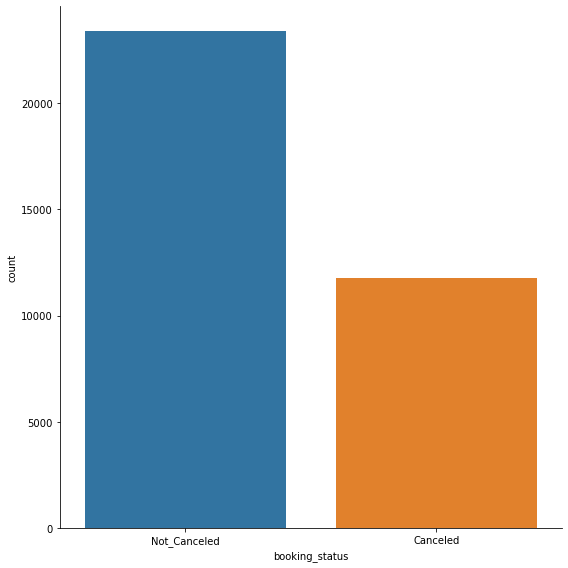

In [30]:
# look in the case where required car parking space = 0
sns.catplot(data=df[df["required_car_parking_space"] == 0], x="booking_status", kind="count",height=8)

In [31]:
# customer no need the car parking space
df_no_car_parking=df[df["required_car_parking_space"] == 0]
total_number = len(df_no_car_parking["required_car_parking_space"])
number_cancel = len(df_no_car_parking["required_car_parking_space"][df_no_car_parking['booking_status'] == 'Canceled'])
print("total number of customer no need the car parking space is",total_number)
print("total number of cancel booking",number_cancel)
print("prob of cancel | customer no need the car parking space",number_cancel*100/total_number)

total number of customer no need the car parking space is 35151
total number of cancel booking 11771
prob of cancel | customer no need the car parking space 33.486956274359194


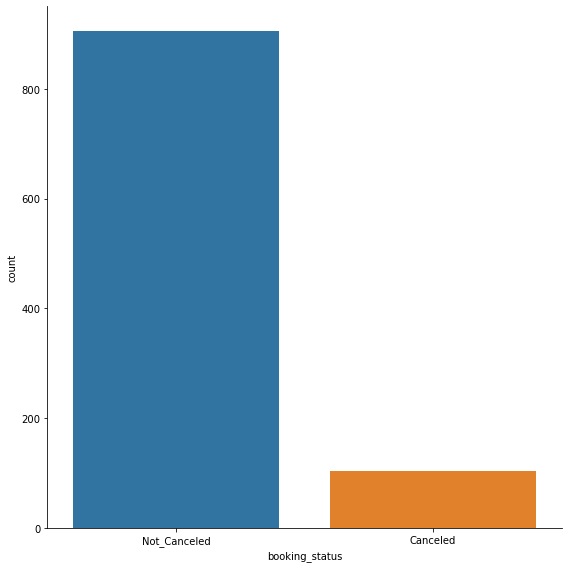

In [32]:
# look in the case where required car parking space = 1 
sns.catplot(data=df_filtered[df_filtered["required_car_parking_space"] == 1], x="booking_status", kind="count",height=8)

In [33]:
# customer need the car parking space
df_car_parking=df_filtered[df_filtered["required_car_parking_space"] == 1]
total_number_need = len(df_car_parking["required_car_parking_space"])
number_Not_cancel = len(df_car_parking["required_car_parking_space"][df_car_parking['booking_status'] == 'Canceled'])
print("total number of customer need the car parking space is",total_number_need)
print("total number of cancel booking",number_Not_cancel)
print("prob of cancel | customer need the car parking space",number_Not_cancel*100/total_number_need)

total number of customer need the car parking space is 1009
total number of cancel booking 104
prob of cancel | customer need the car parking space 10.307234886025768


### from the stat, show us the 
- prob of customer how going to cancel the booking given the customer need the car parking space is 10.3%
- prob of customer how going to cancel the booking given the customer no need the car parking space is 33.8%

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

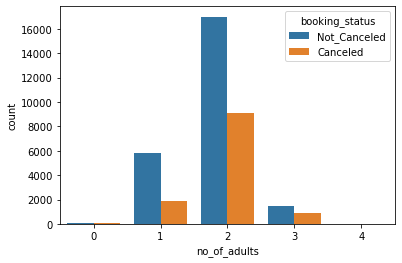

In [34]:
sns.countplot(data=df, x="no_of_adults", hue="booking_status")

In [35]:
## baysiean prob given 
def prob_cal(df,col_name):
    unique_list= pd.unique(df[col_name])
    for i in unique_list:
        df_all = df[df[col_name] == i]
        print('probability booking is Canceled given',col_name,'=',i,'is',len(df_all[df_all['booking_status'] == 'Canceled'])*100/len(df_all))

In [36]:
prob_cal(df,"no_of_adults")

probability booking is Canceled given no_of_adults = 2 is 34.92799142025433
probability booking is Canceled given no_of_adults = 1 is 24.119558154645873
probability booking is Canceled given no_of_adults = 3 is 37.246439361242984
probability booking is Canceled given no_of_adults = 0 is 31.654676258992804
probability booking is Canceled given no_of_adults = 4 is 18.75


<AxesSubplot:xlabel='no_of_children', ylabel='count'>

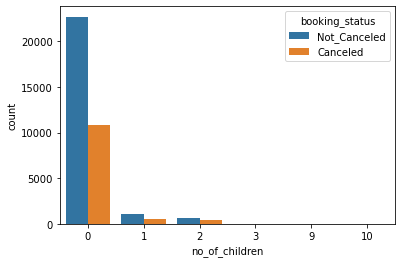

In [37]:
sns.countplot(data=df, x="no_of_children", hue="booking_status")

In [38]:
prob_cal(df,"no_of_children")

probability booking is Canceled given no_of_children = 0 is 32.40908955535039
probability booking is Canceled given no_of_children = 2 is 43.194706994328925
probability booking is Canceled given no_of_children = 1 is 33.374536464771325
probability booking is Canceled given no_of_children = 3 is 26.31578947368421
probability booking is Canceled given no_of_children = 10 is 0.0
probability booking is Canceled given no_of_children = 9 is 50.0


<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='count'>

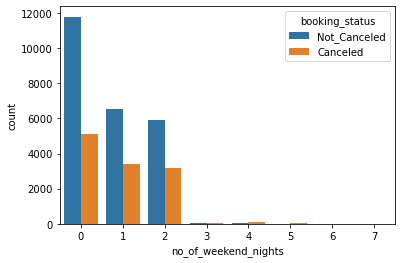

In [39]:
sns.countplot(data=df, x="no_of_weekend_nights", hue="booking_status")

In [40]:
prob_cal(df,"no_of_weekend_nights")

probability booking is Canceled given no_of_weekend_nights = 1 is 34.337168584292144
probability booking is Canceled given no_of_weekend_nights = 2 is 34.803219049718884
probability booking is Canceled given no_of_weekend_nights = 0 is 30.18610715979137
probability booking is Canceled given no_of_weekend_nights = 4 is 64.34108527131782
probability booking is Canceled given no_of_weekend_nights = 3 is 48.36601307189542
probability booking is Canceled given no_of_weekend_nights = 6 is 80.0
probability booking is Canceled given no_of_weekend_nights = 5 is 85.29411764705883
probability booking is Canceled given no_of_weekend_nights = 7 is 100.0


<AxesSubplot:xlabel='no_of_week_nights', ylabel='count'>

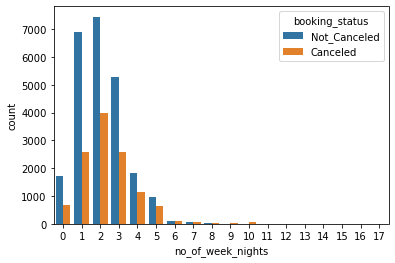

In [41]:
sns.countplot(data=df, x="no_of_week_nights", hue="booking_status")

In [42]:
prob_cal(df,"no_of_weekend_nights")

probability booking is Canceled given no_of_weekend_nights = 1 is 34.337168584292144
probability booking is Canceled given no_of_weekend_nights = 2 is 34.803219049718884
probability booking is Canceled given no_of_weekend_nights = 0 is 30.18610715979137
probability booking is Canceled given no_of_weekend_nights = 4 is 64.34108527131782
probability booking is Canceled given no_of_weekend_nights = 3 is 48.36601307189542
probability booking is Canceled given no_of_weekend_nights = 6 is 80.0
probability booking is Canceled given no_of_weekend_nights = 5 is 85.29411764705883
probability booking is Canceled given no_of_weekend_nights = 7 is 100.0


### more number of day customer at hotel , the more likely the customer is going to cancel the booking

<AxesSubplot:xlabel='no_of_adults', ylabel='avg_price_per_room'>

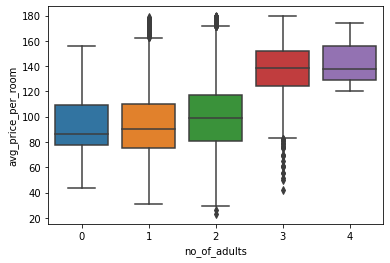

In [43]:
sns.boxplot(data=df_filtered[df_filtered.total_guest<=5], x="no_of_adults", y="avg_price_per_room")

<AxesSubplot:xlabel='no_of_children', ylabel='avg_price_per_room'>

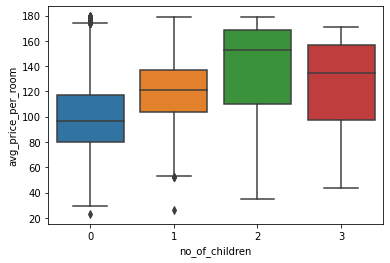

In [44]:
sns.boxplot(data=df_filtered[df_filtered.total_guest<=5], x="no_of_children", y="avg_price_per_room")

<AxesSubplot:xlabel='total_guest', ylabel='avg_price_per_room'>

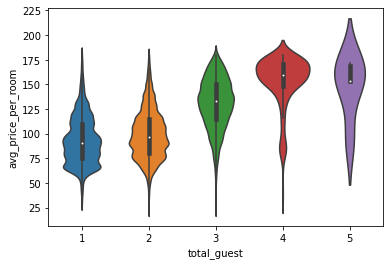

In [45]:
sns.violinplot(data=df_filtered[df_filtered.total_guest<=5], x="total_guest", y="avg_price_per_room")

probability booking is Canceled given type_of_meal_plan = Meal Plan 1 is 31.18016885216454
probability booking is Canceled given type_of_meal_plan = Not Selected is 33.11890838206628
probability booking is Canceled given type_of_meal_plan = Meal Plan 2 is 45.56732223903177
probability booking is Canceled given type_of_meal_plan = Meal Plan 3 is 20.0


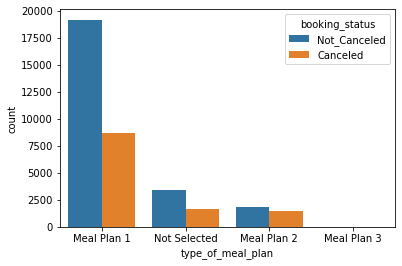

In [46]:
sns.countplot(data=df, x="type_of_meal_plan", hue="booking_status")
prob_cal(df,"type_of_meal_plan")

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='avg_price_per_room'>

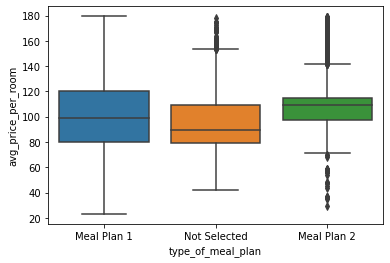

In [47]:
sns.boxplot(data=df_filtered, x="type_of_meal_plan", y="avg_price_per_room")

probability booking is Canceled given room_type_reserved = Room_Type 1 is 32.250266619267684
probability booking is Canceled given room_type_reserved = Room_Type 4 is 34.15882450057784
probability booking is Canceled given room_type_reserved = Room_Type 2 is 32.947976878612714
probability booking is Canceled given room_type_reserved = Room_Type 6 is 42.028985507246375
probability booking is Canceled given room_type_reserved = Room_Type 5 is 27.169811320754718
probability booking is Canceled given room_type_reserved = Room_Type 7 is 22.78481012658228
probability booking is Canceled given room_type_reserved = Room_Type 3 is 28.571428571428573


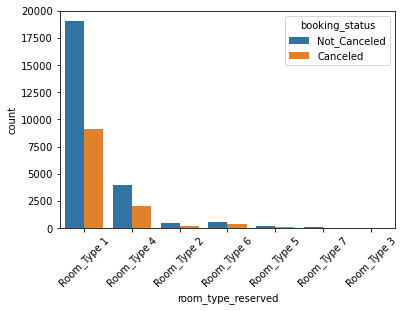

In [48]:
sns.countplot(data=df, x="room_type_reserved", hue="booking_status")
plt.xticks(rotation=45)
prob_cal(df,"room_type_reserved")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

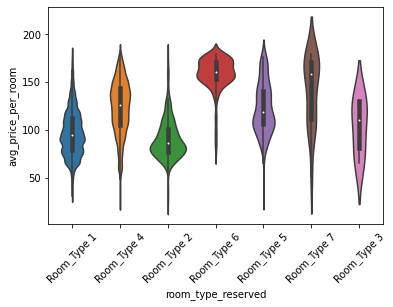

In [49]:
sns.violinplot(data=df_filtered, x="room_type_reserved", y="avg_price_per_room")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

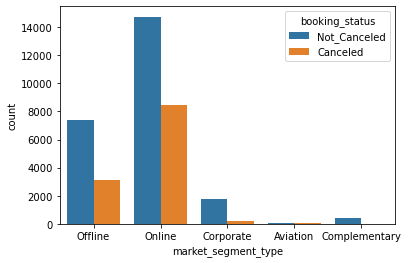

In [50]:
sns.countplot(data=df, x="market_segment_type", hue="booking_status")

In [51]:
prob_cal(df,"market_segment_type")

probability booking is Canceled given market_segment_type = Offline is 29.94870820668693
probability booking is Canceled given market_segment_type = Online is 36.508141638666324
probability booking is Canceled given market_segment_type = Corporate is 10.907288051561725
probability booking is Canceled given market_segment_type = Aviation is 29.6
probability booking is Canceled given market_segment_type = Complementary is 0.0


### from the data show that coporate and complementary segment is the customer who is less canceled

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Offline'),
  Text(1, 0, 'Online'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Aviation'),
  Text(4, 0, 'Complementary')])

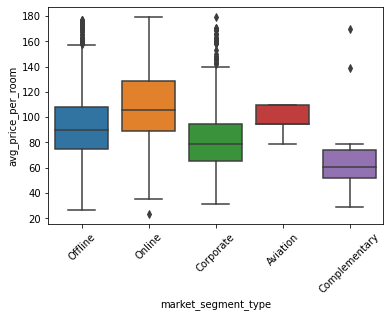

In [52]:
sns.boxplot(data=df_filtered, x="market_segment_type", y="avg_price_per_room")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='repeated_guest', ylabel='count'>

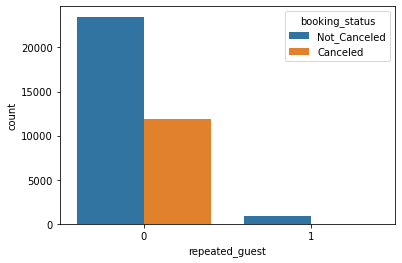

In [53]:
sns.countplot(data=df, x="repeated_guest", hue="booking_status")

In [54]:
prob_cal(df,"repeated_guest")

probability booking is Canceled given repeated_guest = 0 is 33.58042155891923
probability booking is Canceled given repeated_guest = 1 is 1.7204301075268817


probability booking is Canceled given no_of_previous_cancellations = 0 is 33.02724211815121
probability booking is Canceled given no_of_previous_cancellations = 3 is 2.3255813953488373
probability booking is Canceled given no_of_previous_cancellations = 1 is 5.555555555555555
probability booking is Canceled given no_of_previous_cancellations = 2 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 11 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 4 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 5 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 13 is 100.0
probability booking is Canceled given no_of_previous_cancellations = 6 is 0.0


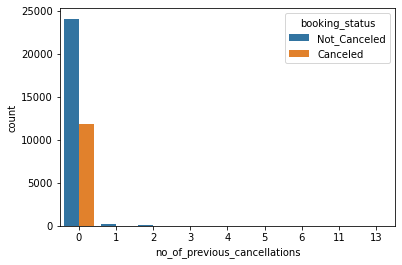

In [55]:
sns.countplot(data=df, x="no_of_previous_cancellations", hue="booking_status")
prob_cal(df,"no_of_previous_cancellations")

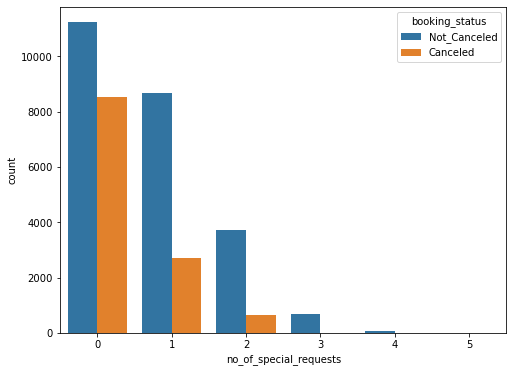

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='no_of_special_requests', hue="booking_status")
plt.show()

In [57]:
prob_cal(df,"no_of_special_requests")

probability booking is Canceled given no_of_special_requests = 0 is 43.2067553218385
probability booking is Canceled given no_of_special_requests = 1 is 23.766816143497756
probability booking is Canceled given no_of_special_requests = 3 is 0.0
probability booking is Canceled given no_of_special_requests = 2 is 14.596700274977085
probability booking is Canceled given no_of_special_requests = 4 is 0.0
probability booking is Canceled given no_of_special_requests = 5 is 0.0


##### insight : no_of_special_requests more than 3 likely to have less Canceled

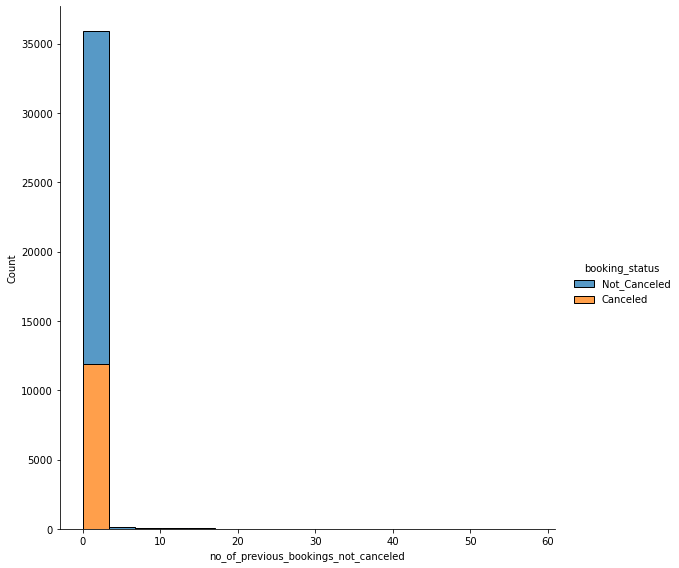

In [58]:
lowb, upb = removeoutliner(df["no_of_previous_cancellations"])

sns.displot(df[df["no_of_previous_cancellations"] < 20], x="no_of_previous_bookings_not_canceled",hue="booking_status"
            ,multiple="stack",height=8)

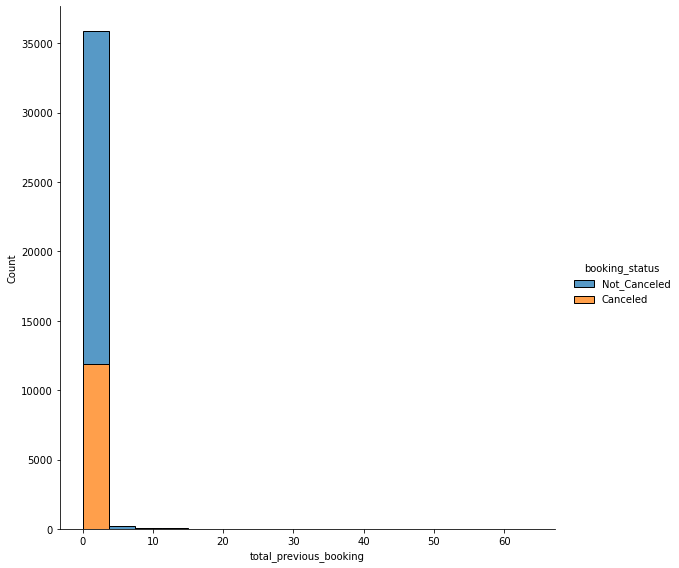

In [59]:
sns.displot(df, x="total_previous_booking", hue="booking_status"
            ,multiple="stack",height=8)

### data preprocessing

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  int64         
 10

In [61]:
#feature used for prediction

feature_cat = ['market_segment_type']
feature_label = ['required_car_parking_space','repeated_guest']
feature_num = ['total_guest','total_night','lead_time','no_of_special_requests','avg_price_per_room']

df_use = df[feature_num + feature_cat + feature_label +['booking_status']]
#encode the categorical data
df_encoded = pd.get_dummies(df_use, columns=feature_cat)
df_encoded.head()


,total_guest,total_night,lead_time,no_of_special_requests,avg_price_per_room,required_car_parking_space,repeated_guest,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,3,224,0,65.00,0,0,Not_Canceled,0,0,0,1,0
1,2,5,5,1,106.68,0,0,Not_Canceled,0,0,0,0,1
2,1,3,1,0,60.00,0,0,Canceled,0,0,0,0,1
3,2,2,211,0,100.00,0,0,Canceled,0,0,0,0,1
4,2,2,48,0,94.50,0,0,Canceled,0,0,0,0,1


In [62]:
le=LabelEncoder()

X = df_encoded.drop('booking_status', axis=1)
df_encoded['booking_status'] = le.fit_transform(df_encoded['booking_status'])

# Label encoding for y
y = df_encoded['booking_status']
y


0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [63]:
#Under sampling the data
rus = RandomUnderSampler(random_state=42)

### create model

In [64]:
sc = StandardScaler()

dc = DecisionTreeClassifier(random_state=24)
rf= RandomForestClassifier(random_state=24)
knn= KNeighborsClassifier()
svm= SVC(random_state=24)
lr = LogisticRegression(max_iter=1000,random_state=24)

models = [dc,rf,knn,svm,lr]

### Train Test Split

In [65]:
X_train_test_spilt = X.copy()
y_train_test_spilt = y.copy()

# Unsampling the data
X_train_test_spilt, y_train_test_spilt = rus.fit_resample(X_train_test_spilt, y_train_test_spilt)

X_train , X_test, y_train, y_test = train_test_split(X_train_test_spilt, y_train_test_spilt, test_size=0.2, random_state=24)

# protect the data leaking from the test data
# normalize the train data
X_train[feature_num] = sc.fit_transform(X_train[feature_num])

# normalize the test data
X_test[feature_num] = sc.transform(X_test[feature_num])


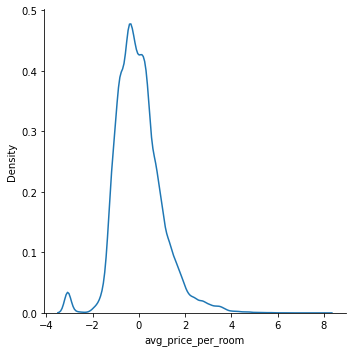

In [66]:
sns.displot(X_train,x="avg_price_per_room", kind="kde")

In [67]:
train_data = pd.concat([X_train,y_train],axis=1)
train_data

,total_guest,total_night,lead_time,no_of_special_requests,avg_price_per_room,required_car_parking_space,repeated_guest,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
14619,0.046721,-0.582112,-0.135482,-0.730636,-0.003808,0,0,0,0,0,1,0,1
6614,0.046721,-0.045177,0.730548,-0.730636,0.729077,0,0,0,0,0,1,0,0
16336,0.046721,-0.582112,-0.860783,-0.730636,-0.150385,0,0,0,0,1,0,0,1
274,1.583828,-0.045177,0.275882,0.618143,1.113109,0,0,0,0,0,0,1,0
16093,1.583828,-0.582112,-0.904085,1.966921,1.374016,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21633,0.046721,-1.119047,-0.990688,0.618143,-0.727898,0,0,0,0,0,0,1,1
19857,-1.490385,-0.582112,-0.849958,-0.730636,-0.619431,0,1,0,0,1,0,0,1
14528,0.046721,-0.045177,-0.070530,-0.730636,-0.963887,0,0,0,0,0,0,1,1
899,-1.490385,-0.582112,-1.055640,-0.730636,-1.176424,0,0,0,0,1,0,0,0


In [68]:
## remove the outlier before train the model
lowb,upb = removeoutliner(train_data["avg_price_per_room"])
train_data = train_data[(train_data["avg_price_per_room"] < upb) & (train_data["avg_price_per_room"] > lowb)]

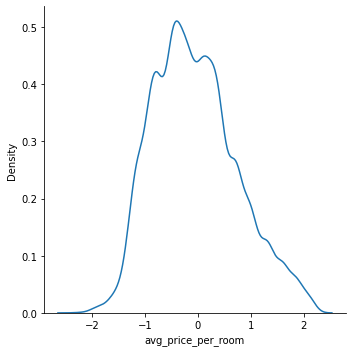

In [69]:
sns.displot(train_data,x="avg_price_per_room", kind="kde")

In [70]:
all_col = list(train_data)
all_col.remove('booking_status')
X_train = train_data[all_col]
y_train = train_data['booking_status']

In [71]:
X_train.dtypes

total_guest                          float64
total_night                          float64
lead_time                            float64
no_of_special_requests               float64
avg_price_per_room                   float64
required_car_parking_space             int64
repeated_guest                         int64
market_segment_type_Aviation           uint8
market_segment_type_Complementary      uint8
market_segment_type_Corporate          uint8
market_segment_type_Offline            uint8
market_segment_type_Online             uint8
dtype: object

In [72]:
X_train

,total_guest,total_night,lead_time,no_of_special_requests,avg_price_per_room,required_car_parking_space,repeated_guest,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
14619,0.046721,-0.582112,-0.135482,-0.730636,-0.003808,0,0,0,0,0,1,0
6614,0.046721,-0.045177,0.730548,-0.730636,0.729077,0,0,0,0,0,1,0
16336,0.046721,-0.582112,-0.860783,-0.730636,-0.150385,0,0,0,0,1,0,0
274,1.583828,-0.045177,0.275882,0.618143,1.113109,0,0,0,0,0,0,1
16093,1.583828,-0.582112,-0.904085,1.966921,1.374016,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21633,0.046721,-1.119047,-0.990688,0.618143,-0.727898,0,0,0,0,0,0,1
19857,-1.490385,-0.582112,-0.849958,-0.730636,-0.619431,0,1,0,0,1,0,0
14528,0.046721,-0.045177,-0.070530,-0.730636,-0.963887,0,0,0,0,0,0,1
899,-1.490385,-0.582112,-1.055640,-0.730636,-1.176424,0,0,0,0,1,0,0


In [73]:
def cal_model(_X_train,_X_test,_y_train,_y_test,model):
   
    model.fit(_X_train,_y_train)
    y_pred = model.predict(_X_test)
    print('###################################################')
    print("Model",type(model).__name__)
    print("Accuracy:",accuracy_score(_y_test, y_pred))
    print("Precision:",precision_score(_y_test, y_pred))
    print("Recall:",recall_score(_y_test, y_pred))
    print("F1 Score:",f1_score(_y_test, y_pred))
    #print("confusion_matrix:",confusion_matrix(_y_test, y_pred))
    
    plt.figure(figsize=(4,2))
    cm=confusion_matrix(y_pred,_y_test)
    sns.heatmap(cm,annot=True, fmt='.6g')
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")
    plt.show()
    
        

#### DecisionTreeClassifier

###################################################
Model DecisionTreeClassifier
Accuracy: 0.8190997055111485
Precision: 0.8240620957309185
Recall: 0.8087177316969953
F1 Score: 0.8163178129004699


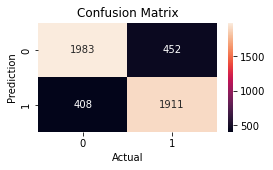

In [74]:
cal_model(X_train , X_test, y_train, y_test,dc)

#### Random Forest

###################################################
Model RandomForestClassifier
Accuracy: 0.8510727808161548
Precision: 0.8466694595726854
Recall: 0.8552687261955142
F1 Score: 0.8509473684210527


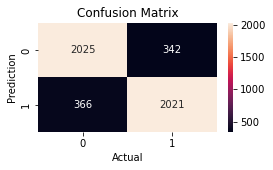

In [75]:
cal_model(X_train , X_test, y_train, y_test,rf)

#### KNeighborsClassifier 

###################################################
Model KNeighborsClassifier
Accuracy: 0.8279343710559529
Precision: 0.8266384778012685
Recall: 0.8273381294964028
F1 Score: 0.8269881556683587


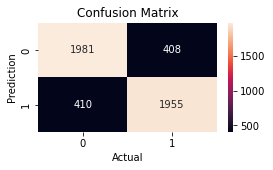

In [76]:
cal_model(X_train , X_test, y_train, y_test,knn)

#### Support Vector Machine

###################################################
Model SVC
Accuracy: 0.8062684055532183
Precision: 0.7930894308943089
Recall: 0.8256453660600931
F1 Score: 0.8090400165871865


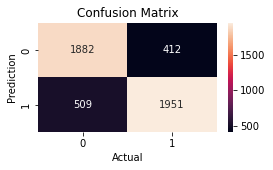

In [77]:
cal_model(X_train , X_test, y_train, y_test,svm)

#### Logistic Regression

###################################################
Model LogisticRegression
Accuracy: 0.7675641564997896
Precision: 0.7647306397306397
Recall: 0.7689377909437156
F1 Score: 0.7668284448195822


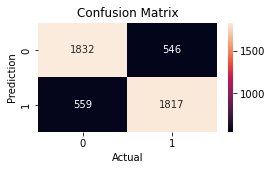

In [78]:
cal_model(X_train , X_test, y_train, y_test,lr)

### Cross Vaildation

In [79]:
#https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/
def cross_validation(_model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=_model,X=_X,y=_y,cv=_cv,scoring=_scoring,return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }
      
    